In [67]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from hurst import compute_Hc
import datetime

In [68]:
# Définir la date de début
start_date = datetime.datetime(1959, 1, 2)

# Définir la date de fin 
end_date = datetime.datetime(2019, 12, 31)

In [69]:
dow_jones = yf.download("DJI", start = start_date, end = end_date)

/Users/nossa/miniconda3/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [70]:
nasdaq = yf.download("^IXIC")

/Users/nossa/miniconda3/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [71]:
dow_data = pd.DataFrame(dow_jones)
nasdaq_data = pd.DataFrame(nasdaq)

In [72]:
def detrend_data(original_data):
    mean_value = np.mean(original_data)
    detrended_data = original_data - mean_value
    return detrended_data

In [ ]:
# La figure interessante est la suivante, les cellules qui suivent ne sont que des tests

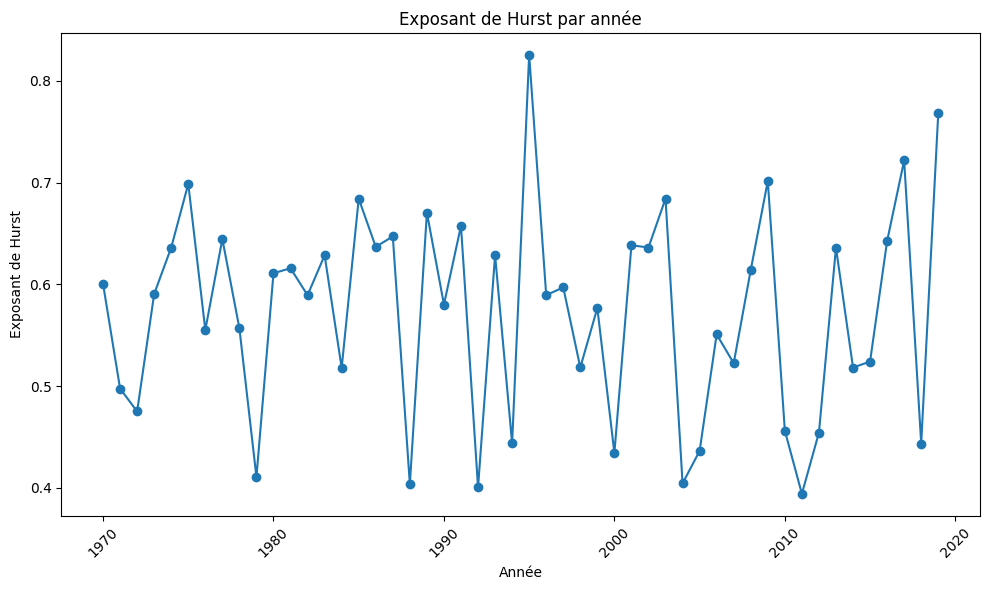

In [73]:
# Function to calculate Hurst exponent
def calculate_hurst(data):
    if len(data) > 100:
        H, c, data_range = compute_Hc(data, kind='price', simplified=True)
    else:
        H = 0
    return H

# Function to plot Hurst exponent over a year
def plot_hurst_over_year(data, value_column):
    # Assuming the dataset has a column for dates
    data['date_column'] = pd.to_datetime(data.index)
    data['year'] = data['date_column'].dt.year

    # Sort the data by date
    data = data.sort_values(by=['date_column'])

     # Calculate Hurst exponent for each semester
    hurst_values = []
    for _, year_data in data.groupby('year'):
        hurst_values.append(calculate_hurst(year_data[value_column].values))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(data['year'].unique(), hurst_values, marker='o', linestyle='-')
    plt.title("Exposant de Hurst par année")
    plt.xlabel('Année')
    plt.ylabel('Exposant de Hurst')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
# Replace 'your_dataset.csv' with the actual file path and column names accordingly
data = dow_data
plot_hurst_over_year(data, 'Adj Close')

In [74]:
dow_data.tail()

,Open,High,Low,Close,Adj Close,Volume,date_column,year
Date,,,,,,,,
2019-05-31,24815.000000,24815.000000,24815.000000,24815.000000,24815.000000,0,2019-05-31,2019
2019-06-03,24819.800781,24819.800781,24819.800781,24819.800781,24819.800781,0,2019-06-03,2019
2019-06-04,25332.199219,25332.199219,25332.199219,25332.199219,25332.199219,0,2019-06-04,2019
2019-06-05,25539.599609,25539.599609,25539.599609,25539.599609,25539.599609,0,2019-06-05,2019
2019-06-07,25983.900391,25983.900391,25983.900391,25983.900391,25983.900391,0,2019-06-07,2019


In [75]:
data['date_column'] = pd.to_datetime(data.index)
data['semester'] = data['date_column'].dt.to_period("6M")
print(data.semester.value_counts())
'''for _, semester_data in data.groupby('semester'):
    print(semester_data.shape)
    break'''

semester
2007-08    23
1990-10    23
1978-08    23
1985-10    23
1974-10    23
           ..
1987-02    19
1980-11    18
2019-02    18
2001-09    15
2019-06     4
Freq: 6M, Name: count, Length: 594, dtype: int64


"for _, semester_data in data.groupby('semester'):\n    print(semester_data.shape)\n    break"

In [76]:
data['date_column'] = pd.to_datetime(data.index)
data['year'] = data['date_column'].dt.year
data

,Open,High,Low,Close,Adj Close,Volume,date_column,year,semester
Date,,,,,,,,,
1970-01-02,809.200012,809.200012,809.200012,809.200012,809.200012,0,1970-01-02,1970,1970-01
1970-01-05,811.309998,811.309998,811.309998,811.309998,811.309998,0,1970-01-05,1970,1970-01
1970-01-06,803.659973,803.659973,803.659973,803.659973,803.659973,0,1970-01-06,1970,1970-01
1970-01-07,801.809998,801.809998,801.809998,801.809998,801.809998,0,1970-01-07,1970,1970-01
1970-01-08,802.070007,802.070007,802.070007,802.070007,802.070007,0,1970-01-08,1970,1970-01
...,...,...,...,...,...,...,...,...,...
2019-05-31,24815.000000,24815.000000,24815.000000,24815.000000,24815.000000,0,2019-05-31,2019,2019-05
2019-06-03,24819.800781,24819.800781,24819.800781,24819.800781,24819.800781,0,2019-06-03,2019,2019-06
2019-06-04,25332.199219,25332.199219,25332.199219,25332.199219,25332.199219,0,2019-06-04,2019,2019-06


In [77]:
dow_data['Adj Close'].values

array([  809.20001221,   811.30999756,   803.65997314, ...,
       25332.19921875, 25539.59960938, 25983.90039062])

In [78]:
pd.to_datetime(data.index)

DatetimeIndex(['1970-01-02', '1970-01-05', '1970-01-06', '1970-01-07',
               '1970-01-08', '1970-01-09', '1970-01-12', '1970-01-13',
               '1970-01-14', '1970-01-15',
               ...
               '2019-05-23', '2019-05-24', '2019-05-28', '2019-05-29',
               '2019-05-30', '2019-05-31', '2019-06-03', '2019-06-04',
               '2019-06-05', '2019-06-07'],
              dtype='datetime64[ns]', name='Date', length=12465, freq=None)